### Problem statement
Leveraging the data of Jamboree, find out which factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv("C:/Users/USER/Downloads/Jamboree_Admission.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#Checking the shape of the data
df.shape

(500, 9)

###### There are 500 rows and 9 columns in our dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
#serial no can be droped
df.drop('Serial No.', axis =1 , inplace = True)
#Dropping duplicate rows if present
df.drop_duplicates(inplace = True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
#Checking for missing values
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

###### We can see there are no missing values present in our dataset

In [10]:
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

###### University Rating, SOP, LOR and Research can be considered categorical variables as unique values are very small

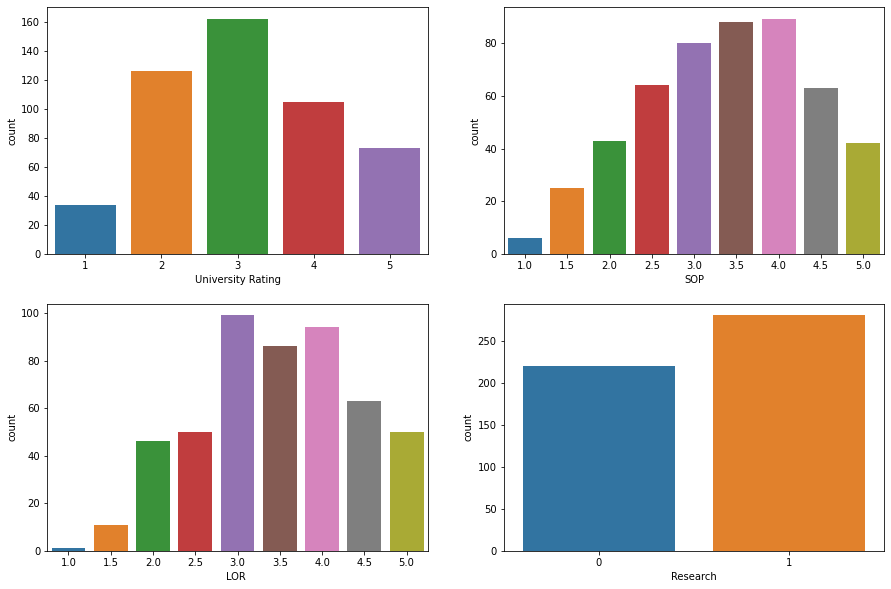

In [11]:
#Analysis of categorical columns by countplot
cat_cols = ['University Rating', 'SOP', 'LOR ' , 'Research']
Fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
k = 0
for i in range(2):
    for j in range(2):
        sns.countplot(data=df, x= cat_cols[k], ax=Axes[i,j])
        k += 1
plt.show()

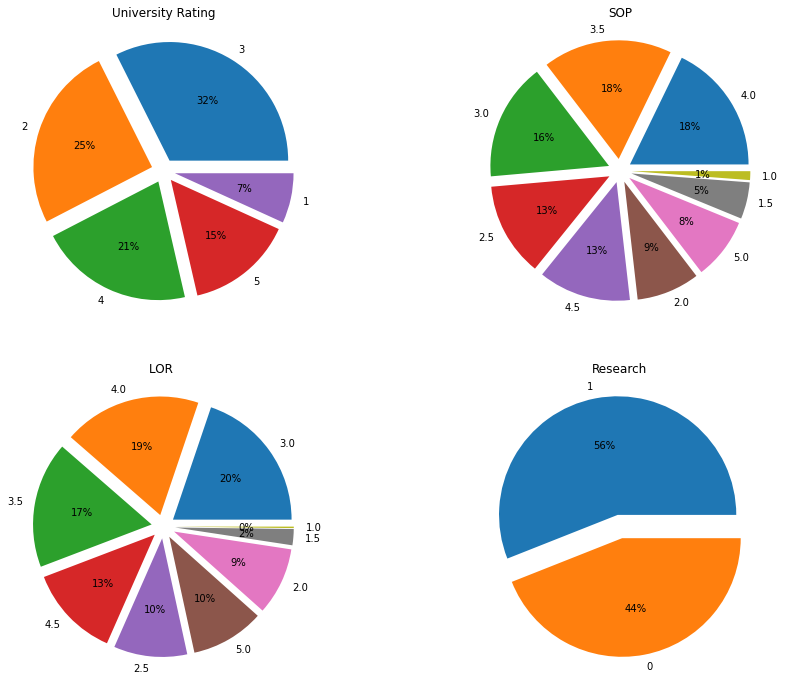

In [12]:
#Proportion analysis by pie chart of categorical columns
plt.figure(figsize = (15,12))
k = 0
for i in range(4):
    plt.subplot(2, 2, i+1)
    data = df[cat_cols[i]].value_counts(normalize=True)*100
    explode = [0.1]*len(data.index)
    plt.gca().title.set_text(cat_cols[i])
    plt.pie(x=data.values, labels=data.index, autopct='%.0f%%', explode= explode)
    k += 1

###### In the dataset,32% data is of university with rating 3, followed by 2 and 4
###### 18% data is of SOP strength  3.5 and same 18% is of 4 , followed by 3
###### 20% of data is of LOR(letter of recommendation) strength 3 followed by strength 4
###### 56% data is of the students with research experience

In [13]:
#All numeric columns 
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit ']

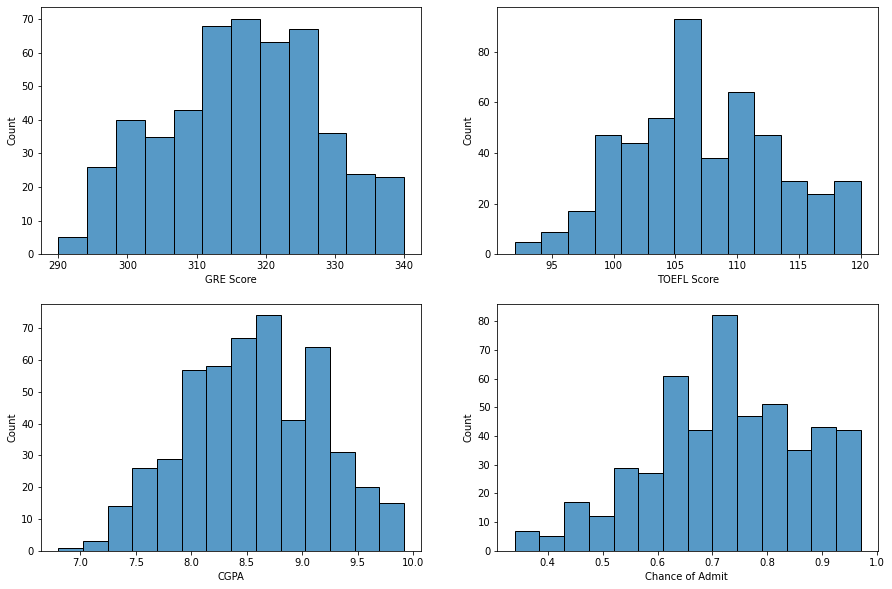

In [14]:
Fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
k = 0
for i in range(2):
    for j in range(2):
        sns.histplot(data=df, x= num_cols[k], ax=Axes[i,j])
        k += 1
plt.show()

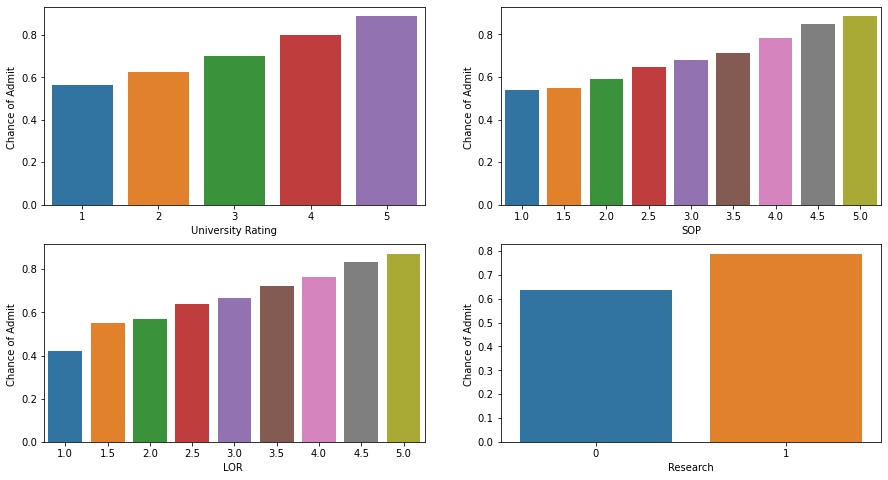

In [15]:
#Analysing the relationship between the dependent and inpendent variable by barplot
Fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
k = 0
for i in range(2):
    for j in range(2):
        sns.barplot(data=df, x= cat_cols[k], y= 'Chance of Admit ', ax=Axes[i,j], ci = None)
        k += 1
plt.show()

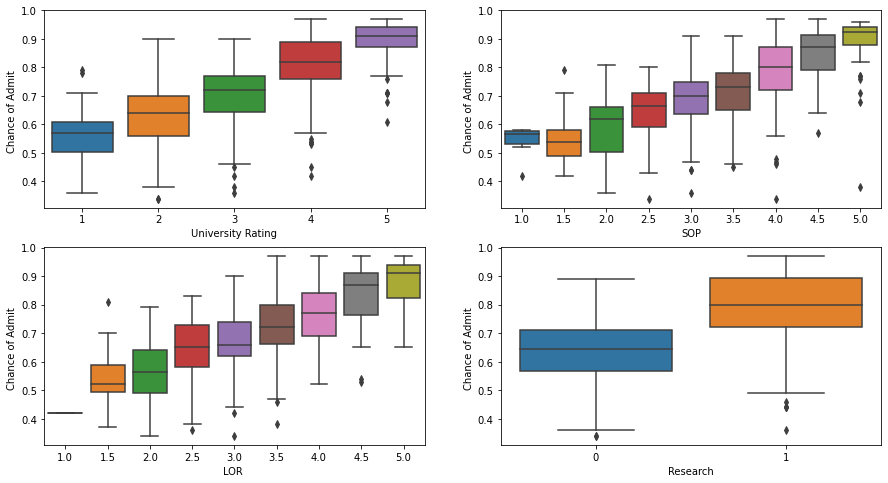

In [16]:
#Analysing the relationship between the dependent and inpendent variable by boxplot
Fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(15,8))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=df, x= cat_cols[k], y= 'Chance of Admit ', ax=Axes[i,j])
        k += 1
plt.show()

###### From the above barplots and boxplots, we can say that chance of admission increases with increase in university rating, with increase in SOP strength, with increase in LOR strength, with increase in research experience

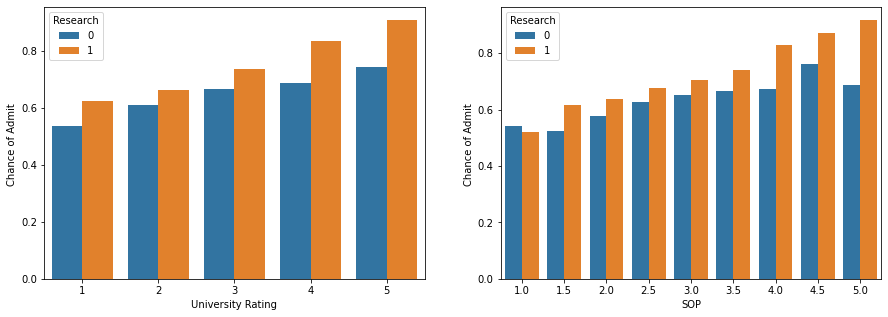

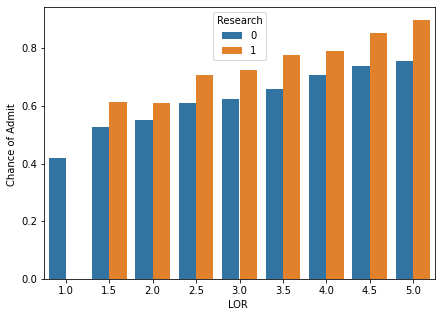

In [17]:
#Multivariate analysis
cols_2 = ['University Rating', 'SOP', 'LOR ']
Fig, Axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
k = 0
for i in range(2):
    sns.barplot(data=df, x= cols_2[k], y= 'Chance of Admit ', hue = 'Research', ax=Axes[i], ci = None)
    k += 1
plt.show()
plt.figure(figsize = (7,5))
sns.barplot(data=df, x= cols_2[k], y= 'Chance of Admit ', hue = 'Research', ci = None)
plt.show()

###### We can see that chances of admission are higer for research experienced students across all university ratings, SOP strengths and LOP strengths

<Figure size 504x360 with 0 Axes>

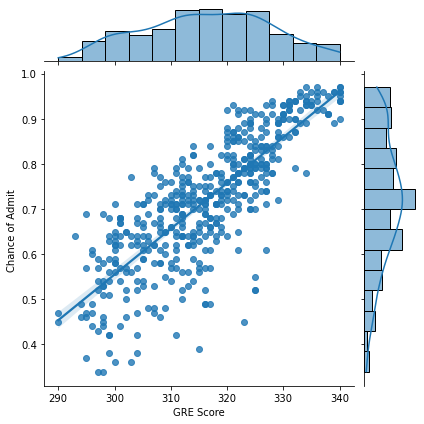

<Figure size 504x360 with 0 Axes>

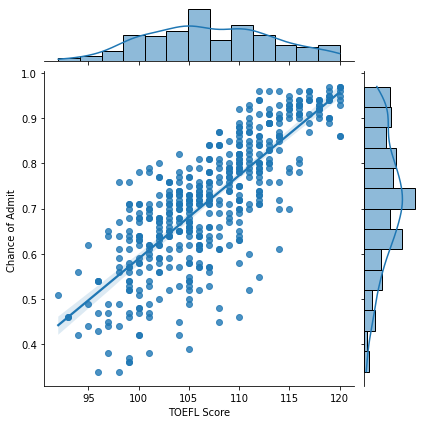

<Figure size 504x360 with 0 Axes>

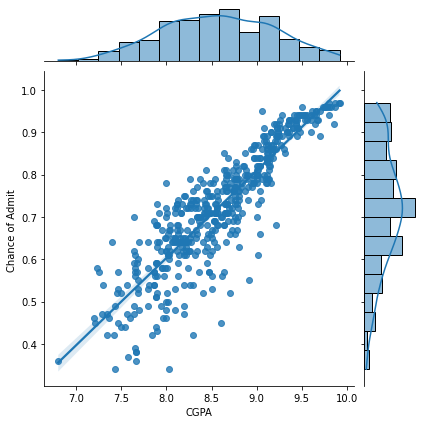

In [18]:
cols_3 = ['GRE Score', 'TOEFL Score', 'CGPA']
k = 0
for i in range(3):
    plt.figure(figsize = (7,5))
    sns.jointplot(data=df, x= cols_3[k], y= 'Chance of Admit ', kind = 'reg')
    plt.show()
    k += 1

##### 

#### 

#### 

#### 

## 

## 

## 

## 

###### From above jointplots, we can say that probability of getting an admission increases with increase in GRE score, TOEFL score and CGPA

### Correlation Metrix

In [19]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


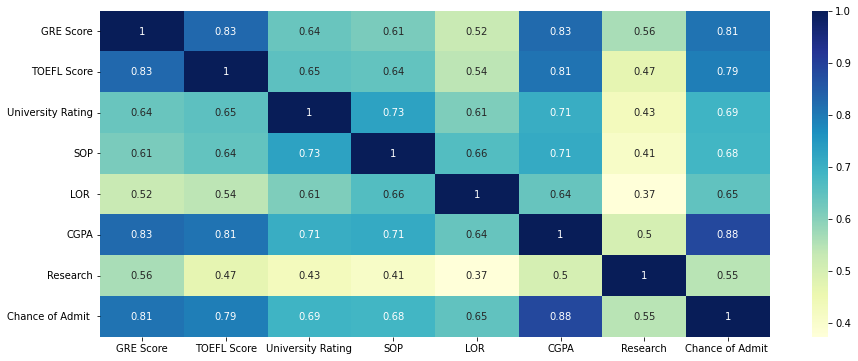

In [20]:
# Correlation Plot above of as a Heatmap -
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

###### We can see that CGPA, GRE Score , TOEFL score have very high correlation with chance of admission
###### SOP, University Rating, LOR , Research also have positive correlation with chance of admission but slightly lesser than above three

### Outlier Detection

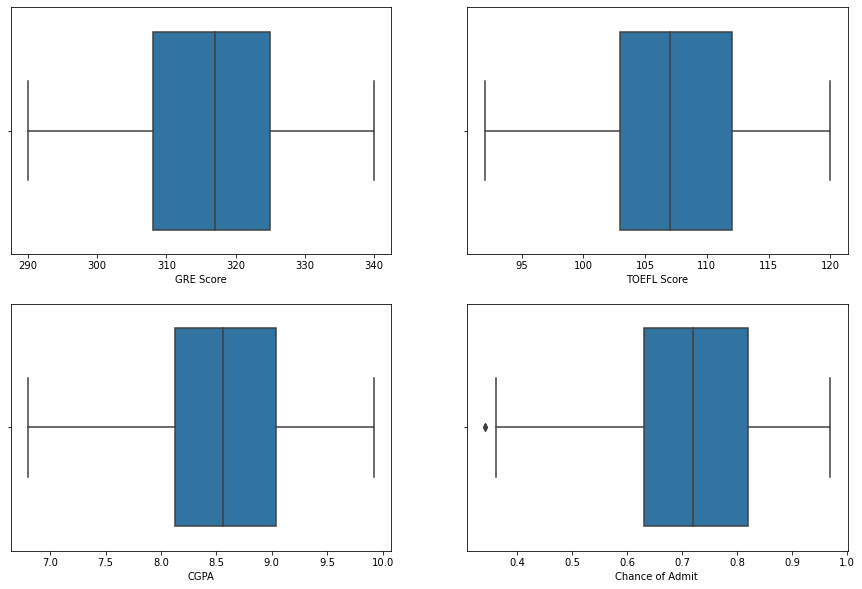

In [21]:
#Outlier detection using boxplot
Fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
k = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(data=df, x= num_cols[k], ax=Axes[i,j])
        k += 1
plt.show()

In [22]:
#Checking for percentage of outliers present in all numeric variables
for col in num_cols:
    df_count = df[col]
    q1 = np.percentile(df_count,25)
    q3 = np.percentile(df_count,75)
    IQR = q3-q1
    upper= q3+1.5*IQR
    lower= q1-1.5*IQR
    if lower < 0:
        lower = 0
    length_excl_outliers = len(df[(df_count>lower)&(df_count<upper)])
    print(f'{np.round((len(df_count)-length_excl_outliers)/len(df_count),3)}% outliers are present in {col}')

0.0% outliers are present in GRE Score
0.0% outliers are present in TOEFL Score
0.0% outliers are present in CGPA
0.004% outliers are present in Chance of Admit 


###### We can see that there are no significant outliers present in the dataset

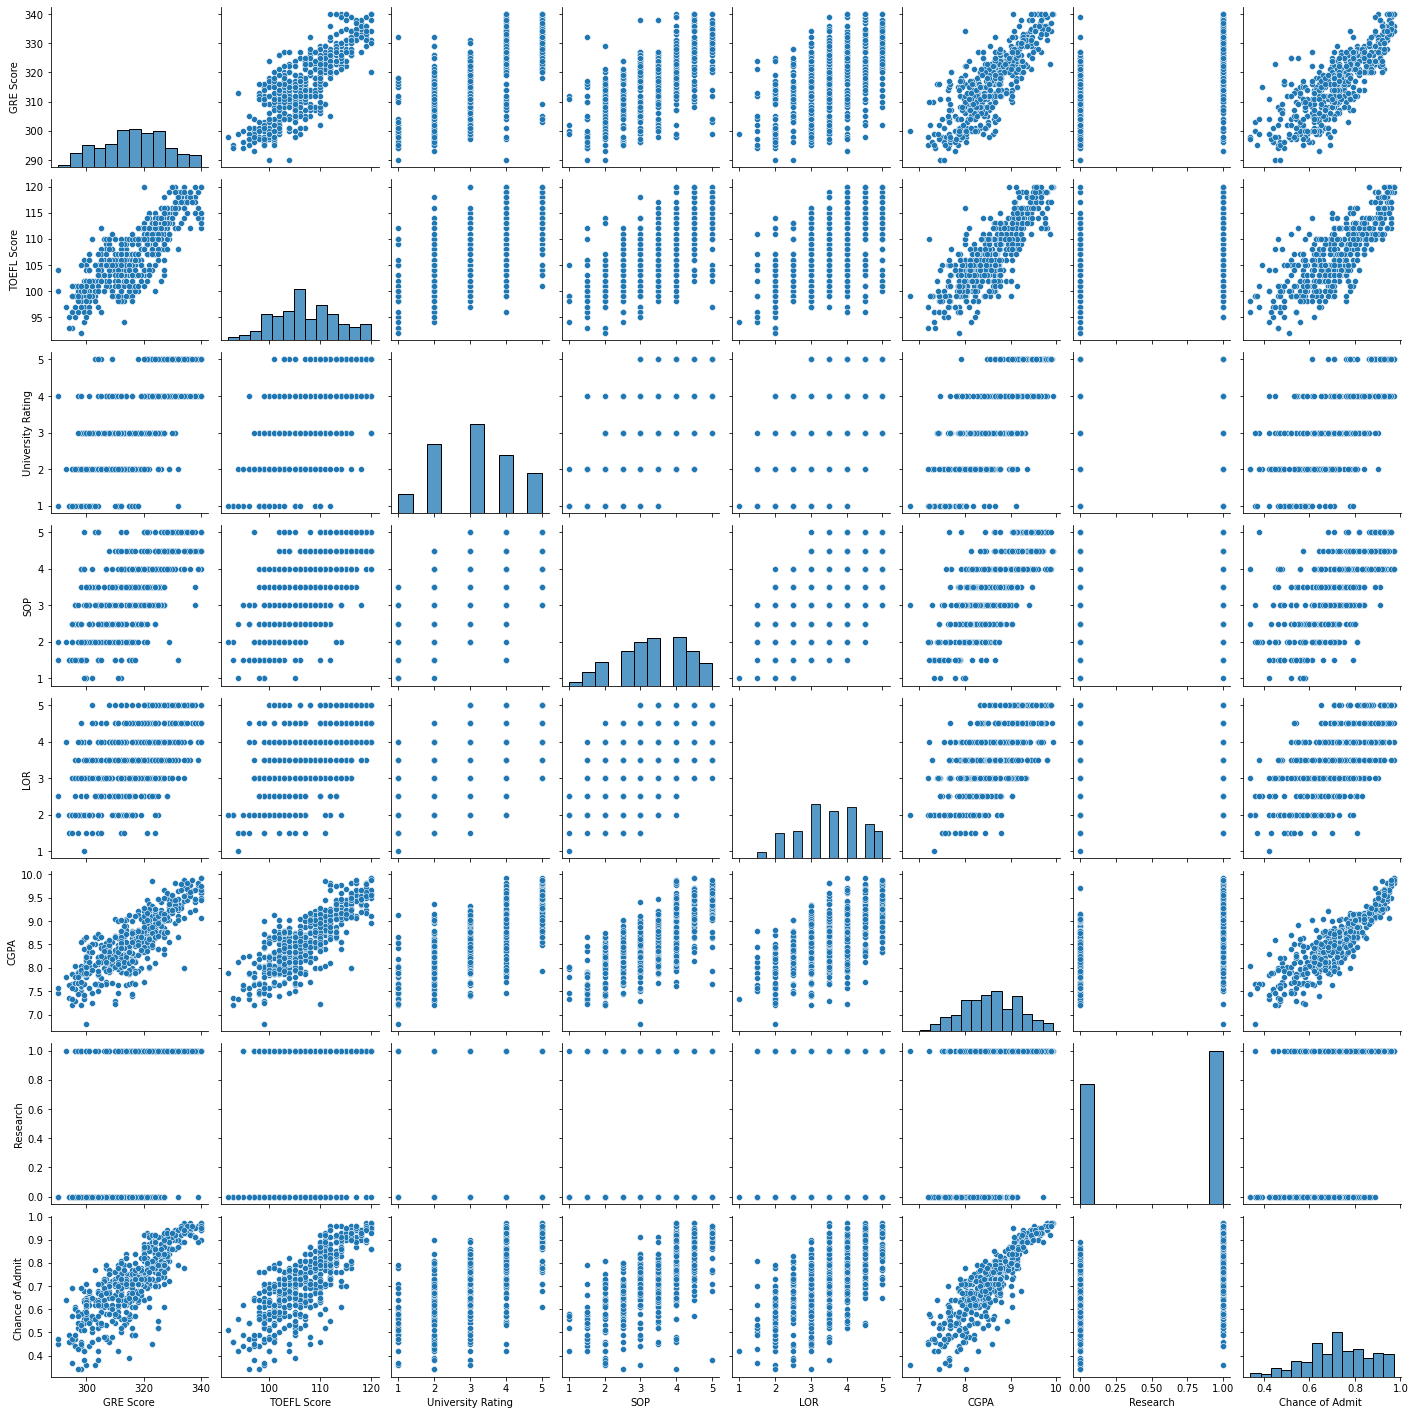

In [23]:
sns.pairplot(df)
plt.show()

### Linear Regression

In [24]:
#Importing libraries for linear regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, adjusted_mutual_info_score
from sklearn.feature_selection import f_regression
from scipy import stats
from sklearn.linear_model import Ridge  
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet


In [25]:
X = df.drop('Chance of Admit ', axis =1) #inpendent variable
y = df['Chance of Admit '].values.reshape(-1,1)  #Target variable

In [26]:
#standardising data
standard = StandardScaler()   
standard.fit(X)
x = standard.transform(X)

In [27]:
#spliting data into test and train
X_train , X_test, y_train , y_test = train_test_split(x,y,
                                                     random_state = 1,
                                                      test_size = 0.2 )

In [28]:
#Checking shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 7), (100, 7), (400, 1), (100, 1))

In [29]:
#Training the model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

LinearRegression()

In [30]:
#R2 score on train data
r2_score(y_train, linear_regression.predict(X_train))

0.8215099192361265

In [31]:
#R2 score on test data
r2_score(y_test, linear_regression.predict(X_test))

0.8208741703103732

In [32]:
#Coefficients and intercept of all features
linear_regression_coeff = pd.DataFrame(linear_regression.coef_.reshape(1,-1), columns = df.columns[:-1])
linear_regression_coeff['Intercept'] = linear_regression.intercept_
linear_regression_coeff

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881


In [33]:
def AdjustedR2score(R2,n,d):
    return 1-(((1-R2)*(n-1))/(n-d-1))

In [34]:
y_pred = linear_regression.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # adjusted R2 score

MSE: 0.0034590988971363833
RMSE: 0.058814104576507695
MAE : 0.040200193804157944
r2_score: 0.8208741703103732
Adjusted R2 score : 0.8183256320830818


#### Testing the assumptions of linear regression

##### Multicolinearity Check by VIF score

In [35]:
VIF = []

for i in range(X_train.shape[1]):
    VIF.append(variance_inflation_factor(exog = X_train, exog_idx = i))
VIF

[4.873264779539275,
 4.2438833386170325,
 2.798251888543383,
 2.9200455031169166,
 2.0793343045164465,
 4.75138916638019,
 1.5081475402055684]

In [36]:
pd.DataFrame(({'Variable Name': X.columns, 'VIF': np.round(VIF,2)}))

,Variable Name,VIF
0,GRE Score,4.87
1,TOEFL Score,4.24
2,University Rating,2.80
3,SOP,2.92
4,LOR,2.08
5,CGPA,4.75
6,Research,1.51


###### We can see VIF score for all variables are less than 5 so Multicolinearity is not high

##### Checking if Mean of Residual is nearly Zero:

In [37]:
y_pred_train = linear_regression.predict(X_train)
residual = y_train - y_pred_train #residual for train data
residual_test = y_test - y_pred # residual for test data
residual.mean(), residual_test.mean()

(1.6653345369377347e-18, -0.005706590389232245)

###### We can see here that mean of residual is nearly zero for test data but not for train data

##### Checking the linearity of variables

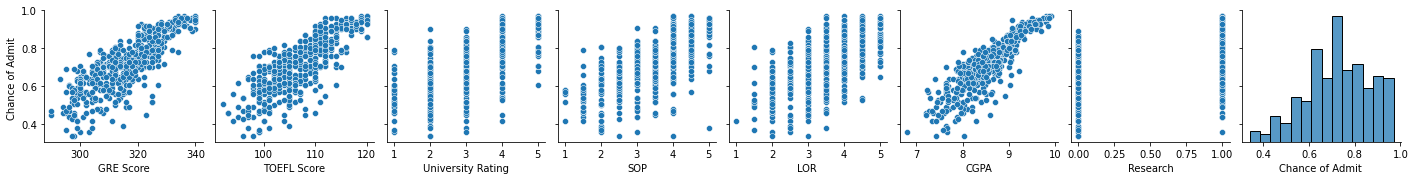

In [38]:
sns.pairplot(df,y_vars = ['Chance of Admit '])
plt.show()

##### Checking the homoscedasticity

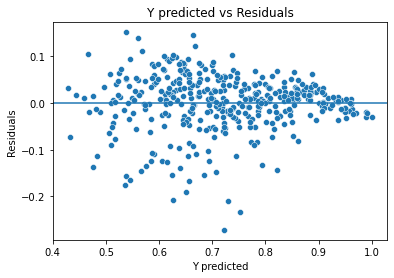

In [39]:
sns.scatterplot(y_pred_train.reshape(-1,), residual.reshape(-1,))
plt.axhline(y = 0)
plt.title('Y predicted vs Residuals')
plt.xlabel('Y predicted')
plt.ylabel('Residuals')
plt.show()

###### From above plot, we can see that some level of heteroscedasticity is present

##### Normality of residuals:

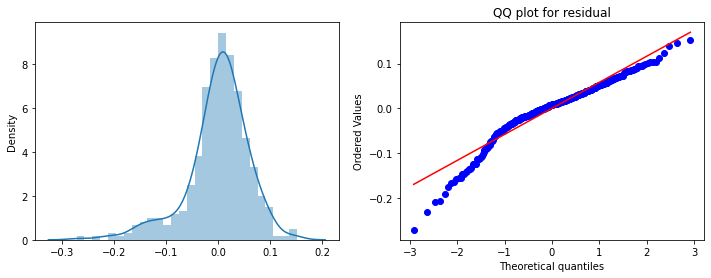

In [40]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(residual)
plt.subplot(1,2,2)
stats.probplot(residual.reshape(-1,), plot = plt)
plt.title('QQ plot for residual')
plt.show()

### Regularization

#### L2 Regularization(Ridge Regression):

In [41]:
#Hyperparameter tuning for lambda 
R2_score_train = []
R2_score_test = []
lambda_values = np.arange(0,10.01, 0.01)
for lamb in lambda_values:
    ridge = Ridge(lamb)
    ridge.fit(X_train, y_train)
    R2_score_train.append(ridge.score(X_train, y_train))
    R2_score_test.append(ridge.score(X_test, y_test))

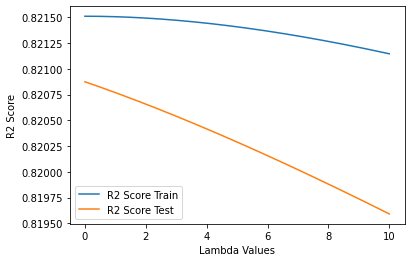

In [42]:
sns.lineplot(lambda_values,R2_score_train)
sns.lineplot(lambda_values,R2_score_test)
plt.xlabel('Lambda Values')
plt.ylabel('R2 Score')
plt.legend(['R2 Score Train', 'R2 Score Test'])
plt.show()

###### We can see here that L2 Regularization ( Ridge Regularization) does not increase model performance 

In [43]:
#Ridge regression with lambda value 0.2
ridge = Ridge(0.2)
ridge.fit(X_train, y_train)
Train_R2 = ridge.score(X_train, y_train)
Test_R2 = ridge.score(X_test, y_test)
Train_R2, Test_R2

(0.82150973321194, 0.8208536669496513)

In [44]:
#Coefficients and intercept of all features
ridge_coefficient = pd.DataFrame(ridge.coef_.reshape(1,-1), columns = df.columns[:-1])
ridge_coefficient['Intercept'] = ridge.intercept_
ridge_coefficient

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020715,0.019309,0.007018,0.003005,0.013347,0.070384,0.009876,0.722882


In [45]:
y_pred = ridge.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # adjusted R2 score

MSE: 0.003459494837535283
RMSE: 0.058817470512895084
MAE : 0.04020591008743713
r2_score: 0.8208536669496513
Adjusted R2 score : 0.818304837007878


#### L1 Regularization(Lasso Regression):

In [46]:
#Hyperparameter tuning for lambda 
R2_score_train = []
R2_score_test = []
lambda_values = np.arange(0,5.001, 0.001)
for lamb in lambda_values:
    lasso = Lasso(lamb)
    lasso.fit(X_train, y_train)
    R2_score_train.append(lasso.score(X_train, y_train))
    R2_score_test.append(lasso.score(X_test, y_test))

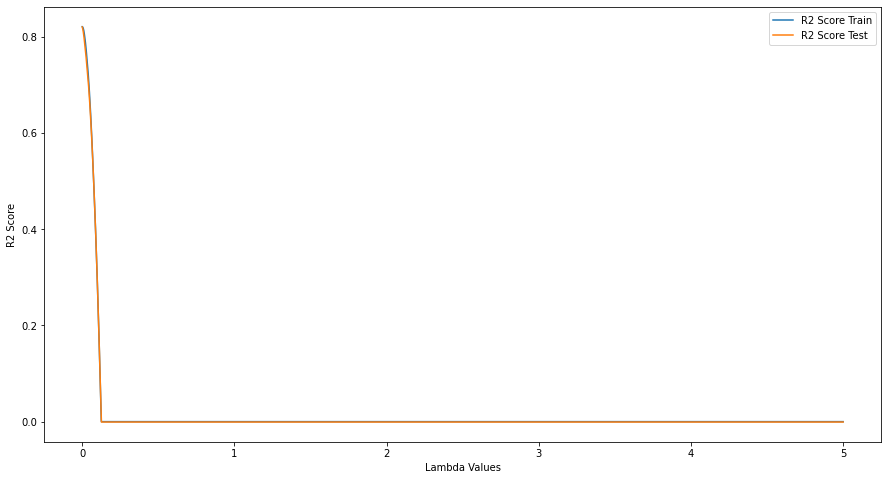

In [47]:
plt.figure(figsize = (15,8))
sns.lineplot(lambda_values,R2_score_train)
sns.lineplot(lambda_values,R2_score_test)
plt.xlabel('Lambda Values')
plt.ylabel('R2 Score')
plt.legend(['R2 Score Train', 'R2 Score Test'])
plt.show()

In [48]:
#Lasso regression with lambda value 0.2
lasso = Lasso(0.002)
lasso.fit(X_train, y_train)
Train_R2 = lasso.score(X_train, y_train)
Test_R2 = lasso.score(X_test, y_test)
Train_R2, Test_R2

(0.8211902508424137, 0.8186641278344822)

In [49]:
lasso_coefs = pd.DataFrame(lasso.coef_.reshape(1,-1),columns=df.columns[:-1])
lasso_coefs["Intercept"] = lasso.intercept_
lasso_coefs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.02057,0.018857,0.006562,0.002643,0.01247,0.070682,0.008679,0.722846


In [50]:
y_pred = lasso.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # adjusted R2 score

MSE: 0.0035017770273883153
RMSE: 0.05917581454773829
MAE : 0.040300969980860746
r2_score: 0.8186641278344822
Adjusted R2 score : 0.816084145913428


#### Elastic Net Regression (L1 + L2 Regularization):

In [51]:
#Hyperparameter tuning for lambda 
R2_score_train = []
R2_score_test = []
lambda_values = np.arange(0,5.001, 0.001)
for lamb in lambda_values:
    elastic_net= ElasticNet(lamb)
    elastic_net.fit(X_train, y_train)
    R2_score_train.append(elastic_net.score(X_train, y_train))
    R2_score_test.append(elastic_net.score(X_test, y_test))

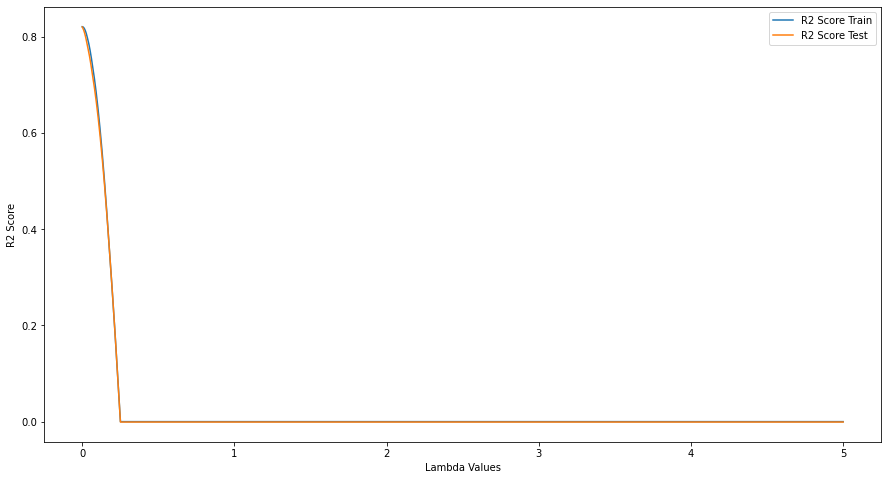

In [52]:
plt.figure(figsize = (15,8))
sns.lineplot(lambda_values,R2_score_train)
sns.lineplot(lambda_values,R2_score_test)
plt.xlabel('Lambda Values')
plt.ylabel('R2 Score')
plt.legend(['R2 Score Train', 'R2 Score Test'])
plt.show()

In [53]:
#Elastic Net regression with lambda value 0.2
elasticnet = ElasticNet(0.002)
elasticnet.fit(X_train, y_train)
Train_R2 = elasticnet.score(X_train, y_train)
Test_R2 = elasticnet.score(X_test, y_test)
Train_R2, Test_R2

(0.8214278983513749, 0.8198035772345473)

In [54]:
elasticnet_coefs = pd.DataFrame(elasticnet.coef_.reshape(1,-1),columns=df.columns[:-1])
elasticnet_coefs["Intercept"] = elasticnet.intercept_
elasticnet_coefs

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
0,0.020696,0.019118,0.006814,0.002867,0.012921,0.070345,0.009285,0.722864


In [55]:
y_pred = elasticnet.predict(X_test)

print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))

MSE: 0.003479773120023657
RMSE: 0.058989601795771236
MAE : 0.040242672048713735
r2_score: 0.8198035772345473
Adjusted R2 score : 0.8172398069919494


#### Combining coefficients and metrics of all models into one dataframe to compare

In [56]:
y_pred = linear_regression.predict(X_test)
linear_regression_metrics = []
linear_regression_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
linear_regression_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
linear_regression_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
linear_regression_metrics.append(r2_score(y_test,y_pred)) # R2score
linear_regression_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # Adjusted R2 score

In [57]:
y_pred = ridge.predict(X_test)
ridge_regression_metrics = []
ridge_regression_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
ridge_regression_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
ridge_regression_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
ridge_regression_metrics.append(r2_score(y_test,y_pred)) # R2score
ridge_regression_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # Adjusted R2 score

In [58]:
y_pred = lasso.predict(X_test)
lasso_regression_metrics = []
lasso_regression_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
lasso_regression_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
lasso_regression_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
lasso_regression_metrics.append(r2_score(y_test,y_pred)) # R2score
lasso_regression_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # Adjusted R2 score

In [59]:
y_pred = elasticnet.predict(X_test)
elasticnet_regression_metrics = []
elasticnet_regression_metrics.append(mean_squared_error(y_test,y_pred)) # MSE
elasticnet_regression_metrics.append(np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
elasticnet_regression_metrics.append(mean_absolute_error(y_test,y_pred) ) # MAE
elasticnet_regression_metrics.append(r2_score(y_test,y_pred)) # R2score
elasticnet_regression_metrics.append(AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1]))  # Adjusted R2 score

In [60]:
metrices_df = pd.DataFrame([linear_regression_metrics,lasso_regression_metrics,
                            ridge_regression_metrics,elasticnet_regression_metrics],
                 columns=["MSE","RMSE","MAE","R2_SCORE","ADJUSTED_R2_SCORE"],
                 index = ["Linear Regression Model","Lasso Regression Model",
                          "Ridge Regression Model","ElasticNet Regression Model"])
metrices_df

,MSE,RMSE,MAE,R2_SCORE,ADJUSTED_R2_SCORE
Linear Regression Model,0.003459,0.058814,0.040200,0.820874,0.818326
Lasso Regression Model,0.003502,0.059176,0.040301,0.818664,0.816084
Ridge Regression Model,0.003459,0.058817,0.040206,0.820854,0.818305
ElasticNet Regression Model,0.003480,0.058990,0.040243,0.819804,0.817240


In [61]:
index = ["Linear Regression Model","Lasso Regression Model","Ridge Regression Model","ElasticNet Regression Model"]
coeff_df = pd.concat([linear_regression_coeff, lasso_coefs, ridge_coefficient, elasticnet_coefs], 
                     ignore_index = True)
coeff_df = pd.DataFrame(coeff_df.values,columns= linear_regression_coeff.columns , index = index)

In [62]:
coeff_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept
Linear Regression Model,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881
Lasso Regression Model,0.020570,0.018857,0.006562,0.002643,0.012470,0.070682,0.008679,0.722846
Ridge Regression Model,0.020715,0.019309,0.007018,0.003005,0.013347,0.070384,0.009876,0.722882
ElasticNet Regression Model,0.020696,0.019118,0.006814,0.002867,0.012921,0.070345,0.009285,0.722864


In [63]:
Final_regression_metrices = pd.concat([coeff_df, metrices_df], axis = 1)
Final_regression_metrices

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Intercept,MSE,RMSE,MAE,R2_SCORE,ADJUSTED_R2_SCORE
Linear Regression Model,0.020675,0.019284,0.007001,0.002975,0.013338,0.070514,0.009873,0.722881,0.003459,0.058814,0.040200,0.820874,0.818326
Lasso Regression Model,0.020570,0.018857,0.006562,0.002643,0.012470,0.070682,0.008679,0.722846,0.003502,0.059176,0.040301,0.818664,0.816084
Ridge Regression Model,0.020715,0.019309,0.007018,0.003005,0.013347,0.070384,0.009876,0.722882,0.003459,0.058817,0.040206,0.820854,0.818305
ElasticNet Regression Model,0.020696,0.019118,0.006814,0.002867,0.012921,0.070345,0.009285,0.722864,0.003480,0.058990,0.040243,0.819804,0.817240


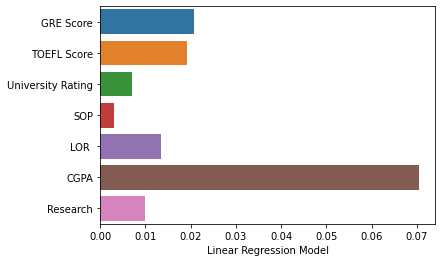

In [64]:
sns.barplot(y = Final_regression_metrices.loc['Linear Regression Model'][0:7].index, 
            x = Final_regression_metrices.loc['Linear Regression Model'][0:7])
plt.show()

###### Through regression analysis, we can see that CGPA is the most important feature in predicting the chances of admission, followed by GRE Score and TOEFL Score.